In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import simulate as sim
import kalman as kf

from scipy.stats import norm
from matplotlib import cm
from importlib import reload
from scipy.optimize import fmin, minimize

# Simulating Data

In [75]:
# S0 = 149.54
S0 = 100
T = 30
# r = 0.0245
r = 0.2
q = 0
N = 10000

In [76]:
# true_params = [r, 3.37776282, 0.10125896, -0.32429652, -0.24495863, 0.15412752]
true_params = [r, 2.2, 0.01, 0.29, -0.6, 0.02]

In [77]:
y = sim.simulate_heston_state(true_params, S0, N=N) 

### simulate path and ekf generated path

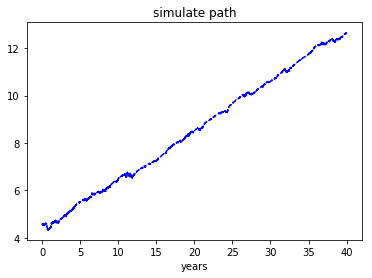

In [78]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.title('simulate path')
plt.xlabel('years')
plt.show()

# neg vol: [[384]]


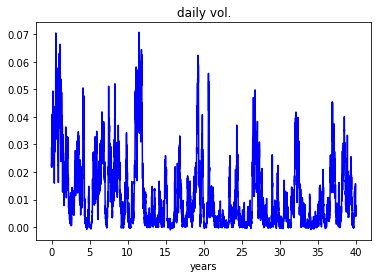

In [79]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b-')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()

# EKF and Parameter Estimation

In [80]:
init_params = [0.6, 1.1, 0.03, 0.35, -0.4, 0.035]

### Initial path vs. true path

In [81]:
y_ = sim.simulate_heston_state(init_params, S0, N=N) 

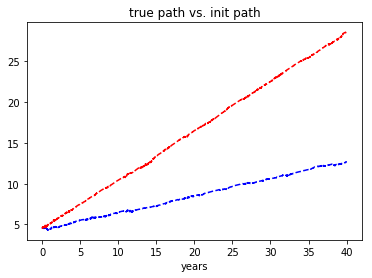

In [82]:
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, y_[0,1:].T, 'r--')
plt.title('true path vs. init path')
plt.xlabel('years')
plt.show()

# neg vol: [[384]]


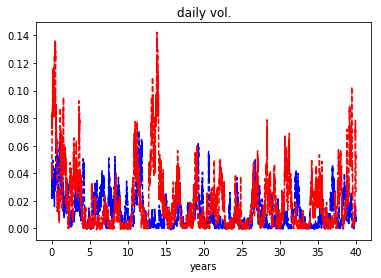

In [83]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b--')
plt.plot(years, y_[1,1:].T, 'r--')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()

### Note: Optimization takes time...

In [84]:
def wrap_heston_obj(params, *args):
    y = args[0]
    S0 = args[1]
    return kf.ekf_heston_obj(y, params, S0)

In [85]:
num_iter = 1
def callbackF(xi):
    global num_iter
    global arg
    print('i: ' + str(num_iter))
    print('x_i: ' + str(xi))
    print('f_i: ' + str(wrap_heston_obj(xi, *args)))
    num_iter += 1

In [87]:
args = (y[0,:].T, S0)
maxiter = 100000

In [88]:
print("Init params: {}".format(init_params))
print("True Params: {}".format(true_params))

Init params: [0.6, 1.1, 0.03, 0.35, -0.4, 0.035]
True Params: [0.2, 2.2, 0.01, 0.29, -0.6, 0.02]


In [ ]:
xopt, fopt, _, _, _ = fmin(wrap_heston_obj, init_params, args=args, maxiter=maxiter, callback=callbackF, 
                           disp=True, retall=False, full_output=True)

i: 1
x_i: [ 0.54      1.1275    0.03075   0.35875  -0.41      0.035875]
f_i: -7171.762669546743
i: 2
x_i: [ 0.54      1.1275    0.03075   0.35875  -0.41      0.035875]
f_i: -7171.762669546743
i: 3
x_i: [ 0.54      1.1275    0.03075   0.35875  -0.41      0.035875]
f_i: -7171.762669546743
i: 4
x_i: [ 0.54666667  1.17333333  0.02825     0.34611111 -0.40333333  0.03733333]
f_i: -7218.661736298928
i: 5
x_i: [ 0.54666667  1.17333333  0.02825     0.34611111 -0.40333333  0.03733333]
f_i: -7218.661736298928
i: 6
x_i: [ 0.49333333  1.24666667  0.0305      0.34222222 -0.40666667  0.037625  ]
f_i: -7293.1596712888595
i: 7
x_i: [ 0.49333333  1.24666667  0.0305      0.34222222 -0.40666667  0.037625  ]
f_i: -7293.1596712888595
i: 8
x_i: [ 0.49333333  1.24666667  0.0305      0.34222222 -0.40666667  0.037625  ]
f_i: -7293.1596712888595
i: 9
x_i: [ 0.40555556  1.28180556  0.02795833  0.35113426 -0.43944444  0.0380625 ]
f_i: -7418.624386183961
i: 10
x_i: [ 0.40555556  1.28180556  0.02795833  0.35113426 -

f_i: -8038.864132298373
i: 77
x_i: [ 0.09857591  2.66407029  0.01263403  0.15874522 -0.16077727  0.07586732]
f_i: -8046.635740247115
i: 78
x_i: [ 0.09857591  2.66407029  0.01263403  0.15874522 -0.16077727  0.07586732]
f_i: -8046.635740247115
i: 79
x_i: [ 0.18488603  2.38534277  0.01225111  0.2015265  -0.23878197  0.06745801]
f_i: -8050.187069703205
i: 80
x_i: [ 0.18488603  2.38534277  0.01225111  0.2015265  -0.23878197  0.06745801]
f_i: -8050.187069703205
i: 81
x_i: [ 0.17372877  2.59453635  0.01036451  0.16128457 -0.16829817  0.07389416]
f_i: -8051.70235548111
i: 82
x_i: [ 0.2134274   2.50811302  0.0118292   0.16586432 -0.17032471  0.07317678]
f_i: -8054.627232314553
i: 83
x_i: [ 0.2134274   2.50811302  0.0118292   0.16586432 -0.17032471  0.07317678]
f_i: -8054.627232314553
i: 84
x_i: [ 0.2134274   2.50811302  0.0118292   0.16586432 -0.17032471  0.07317678]
f_i: -8054.627232314553
i: 85
x_i: [ 0.2134274   2.50811302  0.0118292   0.16586432 -0.17032471  0.07317678]
f_i: -8054.627232314

i: 152
x_i: [ 0.24207016  2.57136808  0.01028404  0.14619524 -0.11797467  0.0752495 ]
f_i: -8059.208431776023
i: 153
x_i: [ 0.23120062  2.56347629  0.01038171  0.1514656  -0.12540797  0.07439391]
f_i: -8059.414761601795
i: 154
x_i: [ 0.24872911  2.54642753  0.01018049  0.15016077 -0.11347867  0.07428377]
f_i: -8059.903997237829
i: 155
x_i: [ 0.24872911  2.54642753  0.01018049  0.15016077 -0.11347867  0.07428377]
f_i: -8059.903997237829
i: 156
x_i: [ 0.23722488  2.52368892  0.01028259  0.16003023 -0.1229081   0.07272947]
f_i: -8060.473345187445
i: 157
x_i: [ 0.23722488  2.52368892  0.01028259  0.16003023 -0.1229081   0.07272947]
f_i: -8060.473345187445
i: 158
x_i: [ 0.23722488  2.52368892  0.01028259  0.16003023 -0.1229081   0.07272947]
f_i: -8060.473345187445
i: 159
x_i: [ 0.22113211  2.51889165  0.01032019  0.16598924 -0.11241468  0.07152855]
f_i: -8061.453311232363
i: 160
x_i: [ 0.22113211  2.51889165  0.01032019  0.16598924 -0.11241468  0.07152855]
f_i: -8061.453311232363
i: 161
x_i

f_i: -8108.048711422182
i: 230
x_i: [0.23605718 1.43463596 0.00965551 0.42895087 0.08960239 0.01913007]
f_i: -8108.048711422182
i: 231
x_i: [0.23605718 1.43463596 0.00965551 0.42895087 0.08960239 0.01913007]
f_i: -8108.048711422182
i: 232
x_i: [0.23605718 1.43463596 0.00965551 0.42895087 0.08960239 0.01913007]
f_i: -8108.048711422182
i: 233
x_i: [0.2359957  1.41926746 0.0095634  0.43306957 0.09076716 0.01827041]
f_i: -8108.054696917309
i: 234
x_i: [0.236267   1.4191035  0.00959309 0.4329525  0.08906147 0.01832781]
f_i: -8108.061000858432
i: 235
x_i: [0.236267   1.4191035  0.00959309 0.4329525  0.08906147 0.01832781]
f_i: -8108.061000858432
i: 236
x_i: [0.23508747 1.42912437 0.00963143 0.43067439 0.08839786 0.0188041 ]
f_i: -8108.071426915951
i: 237
x_i: [0.23508747 1.42912437 0.00963143 0.43067439 0.08839786 0.0188041 ]
f_i: -8108.071426915951
i: 238
x_i: [0.23508747 1.42912437 0.00963143 0.43067439 0.08839786 0.0188041 ]
f_i: -8108.071426915951
i: 239
x_i: [0.23508747 1.42912437 0.009

i: 309
x_i: [0.21930456 1.40470646 0.00961751 0.43766717 0.08738851 0.01775208]
f_i: -8108.281725866795
i: 310
x_i: [0.21889043 1.40994652 0.00967056 0.4357122  0.08579928 0.0181979 ]
f_i: -8108.322264150411
i: 311
x_i: [0.21889043 1.40994652 0.00967056 0.4357122  0.08579928 0.0181979 ]
f_i: -8108.322264150411
i: 312
x_i: [0.21889043 1.40994652 0.00967056 0.4357122  0.08579928 0.0181979 ]
f_i: -8108.322264150411
i: 313
x_i: [0.21186894 1.38821708 0.00963193 0.4397889  0.08328466 0.01764254]
f_i: -8108.37781910334
i: 314
x_i: [0.21241551 1.39606555 0.0096242  0.43735339 0.08597279 0.01804623]
f_i: -8108.45698679605
i: 315
x_i: [0.21241551 1.39606555 0.0096242  0.43735339 0.08597279 0.01804623]
f_i: -8108.45698679605
i: 316
x_i: [0.21241551 1.39606555 0.0096242  0.43735339 0.08597279 0.01804623]
f_i: -8108.45698679605
i: 317
x_i: [0.21241551 1.39606555 0.0096242  0.43735339 0.08597279 0.01804623]
f_i: -8108.45698679605
i: 318
x_i: [0.21761956 1.38717405 0.00956286 0.43505557 0.08667889 0

i: 388
x_i: [0.18038922 1.00925535 0.00742661 0.42440489 0.18981792 0.02273102]
f_i: -8111.811350469986
i: 389
x_i: [0.18038922 1.00925535 0.00742661 0.42440489 0.18981792 0.02273102]
f_i: -8111.811350469986
i: 390
x_i: [0.17858891 0.99000077 0.00728052 0.42691652 0.19398855 0.02223969]
f_i: -8111.821966189189
i: 391
x_i: [0.1765573  0.97959658 0.00721124 0.42566181 0.19842299 0.02256063]
f_i: -8111.830327567936
i: 392
x_i: [0.1765573  0.97959658 0.00721124 0.42566181 0.19842299 0.02256063]
f_i: -8111.830327567936
i: 393
x_i: [0.1765573  0.97959658 0.00721124 0.42566181 0.19842299 0.02256063]
f_i: -8111.830327567936
i: 394
x_i: [0.17656014 0.97593475 0.00718938 0.42560027 0.1975968  0.02260743]
f_i: -8111.833527446558
i: 395
x_i: [0.17656014 0.97593475 0.00718938 0.42560027 0.1975968  0.02260743]
f_i: -8111.833527446558
i: 396
x_i: [0.17697382 0.97912173 0.0071376  0.42488944 0.20035968 0.02264856]
f_i: -8111.851894068035
i: 397
x_i: [0.17697382 0.97912173 0.0071376  0.42488944 0.20035

i: 467
x_i: [0.12051742 0.76462668 0.00296997 0.40216085 0.28769447 0.02660318]
f_i: -8112.35944766022
i: 468
x_i: [0.12051742 0.76462668 0.00296997 0.40216085 0.28769447 0.02660318]
f_i: -8112.35944766022
i: 469
x_i: [0.12051742 0.76462668 0.00296997 0.40216085 0.28769447 0.02660318]
f_i: -8112.35944766022
i: 470
x_i: [0.12392904 0.771979   0.00321534 0.40258064 0.28417308 0.0266163 ]
f_i: -8112.3658871761
i: 471
x_i: [0.12392904 0.771979   0.00321534 0.40258064 0.28417308 0.0266163 ]
f_i: -8112.3658871761
i: 472
x_i: [0.12199591 0.77939311 0.00316951 0.4022103  0.28120843 0.02664876]
f_i: -8112.369927586517
i: 473
x_i: [0.12130627 0.773337   0.00306498 0.40011725 0.2845214  0.02707337]
f_i: -8112.373417718563
i: 474
x_i: [0.12130627 0.773337   0.00306498 0.40011725 0.2845214  0.02707337]
f_i: -8112.373417718563
i: 475
x_i: [0.12130627 0.773337   0.00306498 0.40011725 0.2845214  0.02707337]
f_i: -8112.373417718563
i: 476
x_i: [0.1239533  0.78588317 0.00329225 0.40182152 0.27981891 0.0

f_i: -8112.390222895871
i: 547
x_i: [0.12166339 0.77472741 0.00294442 0.39855774 0.28755856 0.0272649 ]
f_i: -8112.390222895871
i: 548
x_i: [0.12166339 0.77472741 0.00294442 0.39855774 0.28755856 0.0272649 ]
f_i: -8112.390222895871
i: 549
x_i: [0.12166339 0.77472741 0.00294442 0.39855774 0.28755856 0.0272649 ]
f_i: -8112.390222895871
i: 550
x_i: [0.12110149 0.77304142 0.00287634 0.39799448 0.2889311  0.02734696]
f_i: -8112.3903955577
i: 551
x_i: [0.12110149 0.77304142 0.00287634 0.39799448 0.2889311  0.02734696]
f_i: -8112.3903955577
i: 552
x_i: [0.12158335 0.77335877 0.00292725 0.398561   0.28807356 0.02726043]
f_i: -8112.390402090328
i: 553
x_i: [0.12158335 0.77335877 0.00292725 0.398561   0.28807356 0.02726043]
f_i: -8112.390402090328
i: 554
x_i: [0.12158335 0.77335877 0.00292725 0.398561   0.28807356 0.02726043]
f_i: -8112.390402090328
i: 555
x_i: [0.1212822  0.77190762 0.00289244 0.39827439 0.28885859 0.02730753]
f_i: -8112.390464368536
i: 556
x_i: [0.1212822  0.77190762 0.0028924

i: 626
x_i: [0.1215548  0.77121123 0.00287469 0.39826033 0.28984986 0.02727939]
f_i: -8112.391598129918
i: 627
x_i: [0.1215548  0.77121123 0.00287469 0.39826033 0.28984986 0.02727939]
f_i: -8112.391598129918
i: 628
x_i: [0.1215548  0.77121123 0.00287469 0.39826033 0.28984986 0.02727939]
f_i: -8112.391598129918
i: 629
x_i: [0.1215548  0.77121123 0.00287469 0.39826033 0.28984986 0.02727939]
f_i: -8112.391598129918
i: 630
x_i: [0.12142628 0.77204658 0.00290152 0.39868146 0.28894765 0.02720975]
f_i: -8112.391599758839
i: 631
x_i: [0.1212348  0.77078224 0.00288153 0.39871588 0.28949835 0.02719118]
f_i: -8112.391815522941
i: 632
x_i: [0.1212348  0.77078224 0.00288153 0.39871588 0.28949835 0.02719118]
f_i: -8112.391815522941
i: 633
x_i: [0.1212348  0.77078224 0.00288153 0.39871588 0.28949835 0.02719118]
f_i: -8112.391815522941
i: 634
x_i: [0.1212348  0.77078224 0.00288153 0.39871588 0.28949835 0.02719118]
f_i: -8112.391815522941
i: 635
x_i: [0.12125078 0.77108961 0.00287247 0.3985052  0.28968

i: 705
x_i: [0.11430376 0.77261584 0.00273538 0.3937915  0.28488491 0.02746638]
f_i: -8112.486358292361
i: 706
x_i: [0.11430376 0.77261584 0.00273538 0.3937915  0.28488491 0.02746638]
f_i: -8112.486358292361
i: 707
x_i: [0.11332575 0.76966225 0.00248983 0.38923303 0.28921875 0.02803109]
f_i: -8112.505950602648
i: 708
x_i: [0.11413825 0.77116553 0.00254545 0.38882076 0.28743544 0.02793071]
f_i: -8112.532628982192
i: 709
x_i: [0.11413825 0.77116553 0.00254545 0.38882076 0.28743544 0.02793071]
f_i: -8112.532628982192
i: 710
x_i: [0.11413825 0.77116553 0.00254545 0.38882076 0.28743544 0.02793071]
f_i: -8112.532628982192
i: 711
x_i: [0.11157523 0.75228288 0.00212815 0.38661981 0.30013767 0.02827173]
f_i: -8112.546107704279
i: 712
x_i: [0.11022249 0.76227641 0.00217801 0.38449699 0.294393   0.02840679]
f_i: -8112.550521855974
i: 713
x_i: [0.11190073 0.76096799 0.00210076 0.38254666 0.29741705 0.02867291]
f_i: -8112.561004501211
i: 714
x_i: [0.11194273 0.75670412 0.00208001 0.382698   0.29911

i: 781
x_i: [1.08891661e-01 7.16987269e-01 5.44061811e-05 2.52331230e-01
 3.56036144e-01 2.41699715e-02]
f_i: -8117.3883362917895
i: 782
x_i: [1.08891661e-01 7.16987269e-01 5.44061811e-05 2.52331230e-01
 3.56036144e-01 2.41699715e-02]
f_i: -8117.3883362917895
i: 783
x_i: [1.14773732e-01 6.80694982e-01 8.75971640e-05 2.65061061e-01
 3.76138224e-01 2.29181282e-02]
f_i: -8117.560860832004
i: 784
x_i: [ 0.10534711  0.66641493 -0.00078387  0.25707361  0.3918364   0.02488371]
f_i: -8117.8428035723255
i: 785
x_i: [ 0.1058055   0.67019136 -0.00070164  0.23680516  0.3868987   0.02302627]
f_i: -8118.4581508106385
i: 786
x_i: [ 0.1058055   0.67019136 -0.00070164  0.23680516  0.3868987   0.02302627]
f_i: -8118.4581508106385
i: 787
x_i: [ 1.08014485e-01  6.79627354e-01 -4.03606201e-04  2.30715589e-01
  3.84752851e-01  2.21564056e-02]
f_i: -8118.621106386152
i: 788
x_i: [ 1.08014485e-01  6.79627354e-01 -4.03606201e-04  2.30715589e-01
  3.84752851e-01  2.21564056e-02]
f_i: -8118.621106386152
i: 789
x

i: 855
x_i: [ 0.12885102  0.59392118 -0.00080119  0.16002114  0.52337894  0.01971538]
f_i: -8122.212508370113
i: 856
x_i: [ 1.31889285e-01  5.99922624e-01 -5.17925169e-04  1.45454869e-01
  5.30729198e-01  1.86430548e-02]
f_i: -8122.273638418474
i: 857
x_i: [ 1.31889285e-01  5.99922624e-01 -5.17925169e-04  1.45454869e-01
  5.30729198e-01  1.86430548e-02]
f_i: -8122.273638418474
i: 858
x_i: [ 1.31889285e-01  5.99922624e-01 -5.17925169e-04  1.45454869e-01
  5.30729198e-01  1.86430548e-02]
f_i: -8122.273638418474
i: 859
x_i: [ 1.31889285e-01  5.99922624e-01 -5.17925169e-04  1.45454869e-01
  5.30729198e-01  1.86430548e-02]
f_i: -8122.273638418474
i: 860
x_i: [ 1.35185130e-01  6.04772091e-01 -3.68233519e-04  1.54072632e-01
  5.24782893e-01  1.89221808e-02]
f_i: -8122.389309324053
i: 861
x_i: [ 1.35185130e-01  6.04772091e-01 -3.68233519e-04  1.54072632e-01
  5.24782893e-01  1.89221808e-02]
f_i: -8122.389309324053
i: 862
x_i: [ 1.35185130e-01  6.04772091e-01 -3.68233519e-04  1.54072632e-01
  5

i: 917
x_i: [1.44957709e-01 6.33062012e-01 4.35692296e-04 1.26346352e-01
 5.97767568e-01 1.88478186e-02]
f_i: -8123.067526224231
i: 918
x_i: [1.44957709e-01 6.33062012e-01 4.35692296e-04 1.26346352e-01
 5.97767568e-01 1.88478186e-02]
f_i: -8123.067526224231
i: 919
x_i: [1.44957709e-01 6.33062012e-01 4.35692296e-04 1.26346352e-01
 5.97767568e-01 1.88478186e-02]
f_i: -8123.067526224231
i: 920
x_i: [1.44957709e-01 6.33062012e-01 4.35692296e-04 1.26346352e-01
 5.97767568e-01 1.88478186e-02]
f_i: -8123.067526224231
i: 921
x_i: [1.44957709e-01 6.33062012e-01 4.35692296e-04 1.26346352e-01
 5.97767568e-01 1.88478186e-02]
f_i: -8123.067526224231
i: 922
x_i: [1.44957709e-01 6.33062012e-01 4.35692296e-04 1.26346352e-01
 5.97767568e-01 1.88478186e-02]
f_i: -8123.067526224231
i: 923
x_i: [1.44957709e-01 6.33062012e-01 4.35692296e-04 1.26346352e-01
 5.97767568e-01 1.88478186e-02]
f_i: -8123.067526224231
i: 924
x_i: [0.15009441 0.64135986 0.00084921 0.11562598 0.62260341 0.01804133]
f_i: -8123.126628

i: 989
x_i: [ 1.46154940e-01  5.94953181e-01 -9.00657369e-05  9.62460247e-02
  7.86971860e-01  1.75096410e-02]
f_i: -8123.645197808815
i: 990
x_i: [ 1.46154940e-01  5.94953181e-01 -9.00657369e-05  9.62460247e-02
  7.86971860e-01  1.75096410e-02]
f_i: -8123.645197808815
i: 991
x_i: [1.49848540e-01 6.18625940e-01 3.01917216e-04 1.00700979e-01
 7.55864838e-01 1.82084391e-02]
f_i: -8123.660076691884
i: 992
x_i: [ 1.47293761e-01  5.91280821e-01 -2.42300524e-04  9.82395469e-02
  7.95991645e-01  1.79064343e-02]
f_i: -8123.705146931523
i: 993
x_i: [ 1.47372714e-01  5.95971627e-01 -1.65071362e-04  9.77730643e-02
  7.91450602e-01  1.74878139e-02]
f_i: -8123.7069504416595
i: 994
x_i: [ 1.47372714e-01  5.95971627e-01 -1.65071362e-04  9.77730643e-02
  7.91450602e-01  1.74878139e-02]
f_i: -8123.7069504416595
i: 995
x_i: [ 1.44168689e-01  5.93918575e-01 -3.16272878e-04  9.51182351e-02
  7.99466809e-01  1.78441329e-02]
f_i: -8123.73730214607
i: 996
x_i: [ 1.44262033e-01  5.87159640e-01 -3.71680034e-04

i: 1061
x_i: [ 0.13367392  0.57663784 -0.00192364  0.07764293  1.05333372  0.01957855]
f_i: -8124.273188105316
i: 1062
x_i: [ 0.13458172  0.57817347 -0.00186179  0.0772269   1.05787943  0.0196365 ]
f_i: -8124.275060180111
i: 1063
x_i: [ 0.13410884  0.57579488 -0.00192609  0.07836257  1.05257943  0.01960124]
f_i: -8124.276496913998
i: 1064
x_i: [ 0.13382991  0.5791263  -0.00181962  0.07641149  1.05582838  0.01945512]
f_i: -8124.279721371325
i: 1065
x_i: [ 0.13382991  0.5791263  -0.00181962  0.07641149  1.05582838  0.01945512]
f_i: -8124.279721371325
i: 1066
x_i: [ 0.13424693  0.58100836 -0.00181009  0.0772051   1.05365277  0.0196031 ]
f_i: -8124.280505428155
i: 1067
x_i: [ 0.13424693  0.58100836 -0.00181009  0.0772051   1.05365277  0.0196031 ]
f_i: -8124.280505428155
i: 1068
x_i: [ 0.13512314  0.58196485 -0.00168562  0.07727334  1.04833758  0.01949195]
f_i: -8124.288178845548
i: 1069
x_i: [ 0.13512314  0.58196485 -0.00168562  0.07727334  1.04833758  0.01949195]
f_i: -8124.288178845548
i

i: 1135
x_i: [ 0.14050193  0.56827185 -0.00161868  0.06643121  1.22688903  0.018691  ]
f_i: -8124.425736355736
i: 1136
x_i: [ 0.14050193  0.56827185 -0.00161868  0.06643121  1.22688903  0.018691  ]
f_i: -8124.425736355736
i: 1137
x_i: [ 0.14050193  0.56827185 -0.00161868  0.06643121  1.22688903  0.018691  ]
f_i: -8124.425736355736
i: 1138
x_i: [ 0.14050193  0.56827185 -0.00161868  0.06643121  1.22688903  0.018691  ]
f_i: -8124.425736355736
i: 1139
x_i: [ 0.14050193  0.56827185 -0.00161868  0.06643121  1.22688903  0.018691  ]
f_i: -8124.425736355736
i: 1140
x_i: [ 0.13799153  0.57304334 -0.00168772  0.06718692  1.20440418  0.01892742]
f_i: -8124.435754329715
i: 1141
x_i: [ 0.14134698  0.58137131 -0.00143823  0.06482884  1.24925488  0.01900412]
f_i: -8124.454115292709
i: 1142
x_i: [ 0.14134698  0.58137131 -0.00143823  0.06482884  1.24925488  0.01900412]
f_i: -8124.454115292709
i: 1143
x_i: [ 0.14134698  0.58137131 -0.00143823  0.06482884  1.24925488  0.01900412]
f_i: -8124.454115292709
i

i: 1209
x_i: [ 0.13397802  0.57283177 -0.00192783  0.04679162  1.68809392  0.01894506]
f_i: -8124.659591959914
i: 1210
x_i: [ 0.13397802  0.57283177 -0.00192783  0.04679162  1.68809392  0.01894506]
f_i: -8124.659591959914
i: 1211
x_i: [ 0.13533221  0.57703586 -0.00175649  0.04681414  1.68359679  0.0187871 ]
f_i: -8124.66732508899
i: 1212
x_i: [ 0.13533221  0.57703586 -0.00175649  0.04681414  1.68359679  0.0187871 ]
f_i: -8124.66732508899
i: 1213
x_i: [ 0.13533221  0.57703586 -0.00175649  0.04681414  1.68359679  0.0187871 ]
f_i: -8124.66732508899
i: 1214
x_i: [ 0.13533221  0.57703586 -0.00175649  0.04681414  1.68359679  0.0187871 ]
f_i: -8124.66732508899
i: 1215
x_i: [ 0.13535893  0.5786303  -0.00173179  0.04645992  1.70079044  0.01896852]
f_i: -8124.670329144941
i: 1216
x_i: [ 0.13535893  0.5786303  -0.00173179  0.04645992  1.70079044  0.01896852]
f_i: -8124.670329144941
i: 1217
x_i: [ 0.13535893  0.5786303  -0.00173179  0.04645992  1.70079044  0.01896852]
f_i: -8124.670329144941
i: 12

i: 1273
x_i: [ 1.38298820e-01  5.84182422e-01 -1.49829574e-03  4.04891475e-02
  1.93393935e+00  1.89607012e-02]
f_i: -8124.712526751149
i: 1274
x_i: [ 1.36810572e-01  5.76171375e-01 -1.76727585e-03  4.28749592e-02
  1.86129167e+00  1.90883387e-02]
f_i: -8124.7137460823
i: 1275
x_i: [ 1.34979457e-01  5.74044505e-01 -1.88452526e-03  4.03257466e-02
  1.96143612e+00  1.90937145e-02]
f_i: -8124.7197838552565
i: 1276
x_i: [ 1.36211416e-01  5.76243017e-01 -1.79332173e-03  4.10573850e-02
  1.94057464e+00  1.91659723e-02]
f_i: -8124.720487358715
i: 1277
x_i: [ 1.37668990e-01  5.73259064e-01 -1.81442910e-03  4.05358759e-02
  1.97988132e+00  1.91677957e-02]
f_i: -8124.732804273902
i: 1278
x_i: [ 1.37668990e-01  5.73259064e-01 -1.81442910e-03  4.05358759e-02
  1.97988132e+00  1.91677957e-02]
f_i: -8124.732804273902
i: 1279
x_i: [ 1.37668990e-01  5.73259064e-01 -1.81442910e-03  4.05358759e-02
  1.97988132e+00  1.91677957e-02]
f_i: -8124.732804273902
i: 1280
x_i: [ 1.37668990e-01  5.73259064e-01 -1.

i: 1335
x_i: [ 1.37887795e-01  5.69943375e-01 -1.94621176e-03  3.29356257e-02
  2.45657467e+00  1.91269626e-02]
f_i: -8124.800839549986
i: 1336
x_i: [ 1.38698612e-01  5.68403271e-01 -1.96571252e-03  3.25046126e-02
  2.51145702e+00  1.91917922e-02]
f_i: -8124.8029297339035
i: 1337
x_i: [ 1.38698612e-01  5.68403271e-01 -1.96571252e-03  3.25046126e-02
  2.51145702e+00  1.91917922e-02]
f_i: -8124.8029297339035
i: 1338
x_i: [ 1.38698612e-01  5.68403271e-01 -1.96571252e-03  3.25046126e-02
  2.51145702e+00  1.91917922e-02]
f_i: -8124.8029297339035
i: 1339
x_i: [ 1.38698612e-01  5.68403271e-01 -1.96571252e-03  3.25046126e-02
  2.51145702e+00  1.91917922e-02]
f_i: -8124.8029297339035
i: 1340
x_i: [ 1.38698612e-01  5.68403271e-01 -1.96571252e-03  3.25046126e-02
  2.51145702e+00  1.91917922e-02]
f_i: -8124.8029297339035
i: 1341
x_i: [ 1.37910484e-01  5.68638439e-01 -2.02681811e-03  3.22480081e-02
  2.54025516e+00  1.92498448e-02]
f_i: -8124.8060942378725
i: 1342
x_i: [ 1.37910484e-01  5.68638439e

i: 1396
x_i: [ 1.35816058e-01  5.62663672e-01 -2.23661298e-03  2.70078124e-02
  3.02780305e+00  1.91001396e-02]
f_i: -8124.841218909543
i: 1397
x_i: [ 1.35816058e-01  5.62663672e-01 -2.23661298e-03  2.70078124e-02
  3.02780305e+00  1.91001396e-02]
f_i: -8124.841218909543
i: 1398
x_i: [ 1.36310052e-01  5.68173026e-01 -2.04178109e-03  2.65202859e-02
  3.04077163e+00  1.90370243e-02]
f_i: -8124.843643952851
i: 1399
x_i: [ 1.36310052e-01  5.68173026e-01 -2.04178109e-03  2.65202859e-02
  3.04077163e+00  1.90370243e-02]
f_i: -8124.843643952851
i: 1400
x_i: [ 1.36310052e-01  5.68173026e-01 -2.04178109e-03  2.65202859e-02
  3.04077163e+00  1.90370243e-02]
f_i: -8124.843643952851
i: 1401
x_i: [ 1.36310052e-01  5.68173026e-01 -2.04178109e-03  2.65202859e-02
  3.04077163e+00  1.90370243e-02]
f_i: -8124.843643952851
i: 1402
x_i: [ 1.36310052e-01  5.68173026e-01 -2.04178109e-03  2.65202859e-02
  3.04077163e+00  1.90370243e-02]
f_i: -8124.843643952851
i: 1403
x_i: [ 1.36310052e-01  5.68173026e-01 -2

i: 1457
x_i: [ 1.36214715e-01  5.64178643e-01 -2.10573018e-03  2.27085983e-02
  3.55215618e+00  1.87970176e-02]
f_i: -8124.860639173768
i: 1458
x_i: [ 1.36586798e-01  5.66202922e-01 -2.04831402e-03  2.29276576e-02
  3.51858006e+00  1.88385435e-02]
f_i: -8124.861562129948
i: 1459
x_i: [ 1.36586798e-01  5.66202922e-01 -2.04831402e-03  2.29276576e-02
  3.51858006e+00  1.88385435e-02]
f_i: -8124.861562129948
i: 1460
x_i: [ 1.36586798e-01  5.66202922e-01 -2.04831402e-03  2.29276576e-02
  3.51858006e+00  1.88385435e-02]
f_i: -8124.861562129948
i: 1461
x_i: [ 1.36586798e-01  5.66202922e-01 -2.04831402e-03  2.29276576e-02
  3.51858006e+00  1.88385435e-02]
f_i: -8124.861562129948
i: 1462
x_i: [ 1.36586798e-01  5.66202922e-01 -2.04831402e-03  2.29276576e-02
  3.51858006e+00  1.88385435e-02]
f_i: -8124.861562129948
i: 1463
x_i: [ 1.36586798e-01  5.66202922e-01 -2.04831402e-03  2.29276576e-02
  3.51858006e+00  1.88385435e-02]
f_i: -8124.861562129948
i: 1464
x_i: [ 1.36586798e-01  5.66202922e-01 -2

f_i: -8124.8683239452885
i: 1518
x_i: [ 1.37806777e-01  5.66603784e-01 -2.02645965e-03  2.11630350e-02
  3.82809508e+00  1.89146318e-02]
f_i: -8124.8683239452885
i: 1519
x_i: [ 1.38030709e-01  5.65649644e-01 -2.03411361e-03  2.13919446e-02
  3.79973843e+00  1.89436782e-02]
f_i: -8124.8686378736775
i: 1520
x_i: [ 1.38030709e-01  5.65649644e-01 -2.03411361e-03  2.13919446e-02
  3.79973843e+00  1.89436782e-02]
f_i: -8124.8686378736775
i: 1521
x_i: [ 1.38007482e-01  5.67465182e-01 -1.99738174e-03  2.14393315e-02
  3.78375222e+00  1.89722957e-02]
f_i: -8124.868802873308
i: 1522
x_i: [ 1.38007482e-01  5.67465182e-01 -1.99738174e-03  2.14393315e-02
  3.78375222e+00  1.89722957e-02]
f_i: -8124.868802873308
i: 1523
x_i: [ 1.37610921e-01  5.65877650e-01 -2.05473136e-03  2.14317300e-02
  3.79250079e+00  1.89432242e-02]
f_i: -8124.868835989423
i: 1524
x_i: [ 1.38080293e-01  5.66826877e-01 -2.00378034e-03  2.12915685e-02
  3.81272844e+00  1.89323553e-02]
f_i: -8124.868917584218
i: 1525
x_i: [ 1.378

i: 1579
x_i: [ 1.36777015e-01  5.64198371e-01 -2.12815302e-03  1.85717603e-02
  4.37925394e+00  1.90584716e-02]
f_i: -8124.881669604214
i: 1580
x_i: [ 1.36777015e-01  5.64198371e-01 -2.12815302e-03  1.85717603e-02
  4.37925394e+00  1.90584716e-02]
f_i: -8124.881669604214
i: 1581
x_i: [ 1.35718558e-01  5.63100250e-01 -2.23512749e-03  1.83892419e-02
  4.43005550e+00  1.91378428e-02]
f_i: -8124.881933292828
i: 1582
x_i: [ 1.35718558e-01  5.63100250e-01 -2.23512749e-03  1.83892419e-02
  4.43005550e+00  1.91378428e-02]
f_i: -8124.881933292828
i: 1583
x_i: [ 1.35718558e-01  5.63100250e-01 -2.23512749e-03  1.83892419e-02
  4.43005550e+00  1.91378428e-02]
f_i: -8124.881933292828
i: 1584
x_i: [ 1.35718558e-01  5.63100250e-01 -2.23512749e-03  1.83892419e-02
  4.43005550e+00  1.91378428e-02]
f_i: -8124.881933292828
i: 1585
x_i: [ 1.35718558e-01  5.63100250e-01 -2.23512749e-03  1.83892419e-02
  4.43005550e+00  1.91378428e-02]
f_i: -8124.881933292828
i: 1586
x_i: [ 1.36936499e-01  5.66021337e-01 -2

i: 1640
x_i: [ 1.36722825e-01  5.65754186e-01 -2.11777398e-03  1.65496953e-02
  4.90186477e+00  1.91065967e-02]
f_i: -8124.888829955615
i: 1641
x_i: [ 1.36722825e-01  5.65754186e-01 -2.11777398e-03  1.65496953e-02
  4.90186477e+00  1.91065967e-02]
f_i: -8124.888829955615
i: 1642
x_i: [ 1.35783388e-01  5.64396485e-01 -2.20444500e-03  1.66138078e-02
  4.89373407e+00  1.90893651e-02]
f_i: -8124.889508307758
i: 1643
x_i: [ 1.35783388e-01  5.64396485e-01 -2.20444500e-03  1.66138078e-02
  4.89373407e+00  1.90893651e-02]
f_i: -8124.889508307758
i: 1644
x_i: [ 1.35783388e-01  5.64396485e-01 -2.20444500e-03  1.66138078e-02
  4.89373407e+00  1.90893651e-02]
f_i: -8124.889508307758
i: 1645
x_i: [ 1.36480679e-01  5.65497624e-01 -2.14367349e-03  1.65093254e-02
  4.91747757e+00  1.90634924e-02]
f_i: -8124.889735959034
i: 1646
x_i: [ 1.36480679e-01  5.65497624e-01 -2.14367349e-03  1.65093254e-02
  4.91747757e+00  1.90634924e-02]
f_i: -8124.889735959034
i: 1647
x_i: [ 1.36207358e-01  5.63916284e-01 -2

i: 1701
x_i: [ 1.35760884e-01  5.66172949e-01 -2.17624081e-03  1.52734878e-02
  5.31459402e+00  1.91150122e-02]
f_i: -8124.893108290495
i: 1702
x_i: [ 1.35760884e-01  5.66172949e-01 -2.17624081e-03  1.52734878e-02
  5.31459402e+00  1.91150122e-02]
f_i: -8124.893108290495
i: 1703
x_i: [ 1.35760884e-01  5.66172949e-01 -2.17624081e-03  1.52734878e-02
  5.31459402e+00  1.91150122e-02]
f_i: -8124.893108290495
i: 1704
x_i: [ 1.35760884e-01  5.66172949e-01 -2.17624081e-03  1.52734878e-02
  5.31459402e+00  1.91150122e-02]
f_i: -8124.893108290495
i: 1705
x_i: [ 1.35760884e-01  5.66172949e-01 -2.17624081e-03  1.52734878e-02
  5.31459402e+00  1.91150122e-02]
f_i: -8124.893108290495
i: 1706
x_i: [ 1.36052562e-01  5.67581121e-01 -2.12737000e-03  1.50152429e-02
  5.38680259e+00  1.91136618e-02]
f_i: -8124.893185036619
i: 1707
x_i: [ 1.36062370e-01  5.66483651e-01 -2.14316415e-03  1.50532826e-02
  5.38590424e+00  1.91017826e-02]
f_i: -8124.894133893091
i: 1708
x_i: [ 1.36062370e-01  5.66483651e-01 -2

i: 1762
x_i: [ 1.36863247e-01  5.64799009e-01 -2.11265232e-03  1.37048868e-02
  5.92097658e+00  1.89778167e-02]
f_i: -8124.898902963734
i: 1763
x_i: [ 1.36863247e-01  5.64799009e-01 -2.11265232e-03  1.37048868e-02
  5.92097658e+00  1.89778167e-02]
f_i: -8124.898902963734
i: 1764
x_i: [ 1.36863247e-01  5.64799009e-01 -2.11265232e-03  1.37048868e-02
  5.92097658e+00  1.89778167e-02]
f_i: -8124.898902963734
i: 1765
x_i: [ 1.36863247e-01  5.64799009e-01 -2.11265232e-03  1.37048868e-02
  5.92097658e+00  1.89778167e-02]
f_i: -8124.898902963734
i: 1766
x_i: [ 1.36749377e-01  5.64211356e-01 -2.12746909e-03  1.35938600e-02
  5.96731433e+00  1.89525429e-02]
f_i: -8124.899082530711
i: 1767
x_i: [ 1.36749377e-01  5.64211356e-01 -2.12746909e-03  1.35938600e-02
  5.96731433e+00  1.89525429e-02]
f_i: -8124.899082530711
i: 1768
x_i: [ 1.36362356e-01  5.64830101e-01 -2.13079784e-03  1.35127504e-02
  5.99101232e+00  1.89628961e-02]
f_i: -8124.8993204416665
i: 1769
x_i: [ 1.36362356e-01  5.64830101e-01 -

i: 1823
x_i: [ 1.36419068e-01  5.64379433e-01 -2.16183470e-03  1.25625428e-02
  6.46877091e+00  1.90141899e-02]
f_i: -8124.902180990101
i: 1824
x_i: [ 1.36419068e-01  5.64379433e-01 -2.16183470e-03  1.25625428e-02
  6.46877091e+00  1.90141899e-02]
f_i: -8124.902180990101
i: 1825
x_i: [ 1.36419068e-01  5.64379433e-01 -2.16183470e-03  1.25625428e-02
  6.46877091e+00  1.90141899e-02]
f_i: -8124.902180990101
i: 1826
x_i: [ 1.36902101e-01  5.65254184e-01 -2.12046737e-03  1.22815361e-02
  6.60846037e+00  1.90117270e-02]
f_i: -8124.902525230242
i: 1827
x_i: [ 1.36902101e-01  5.65254184e-01 -2.12046737e-03  1.22815361e-02
  6.60846037e+00  1.90117270e-02]
f_i: -8124.902525230242
i: 1828
x_i: [ 1.36902101e-01  5.65254184e-01 -2.12046737e-03  1.22815361e-02
  6.60846037e+00  1.90117270e-02]
f_i: -8124.902525230242
i: 1829
x_i: [ 1.36902101e-01  5.65254184e-01 -2.12046737e-03  1.22815361e-02
  6.60846037e+00  1.90117270e-02]
f_i: -8124.902525230242
i: 1830
x_i: [ 1.36661874e-01  5.64434910e-01 -2

i: 1884
x_i: [ 1.36665851e-01  5.64195465e-01 -2.15004458e-03  1.12409916e-02
  7.22626780e+00  1.90162578e-02]
f_i: -8124.905377240623
i: 1885
x_i: [ 1.36665851e-01  5.64195465e-01 -2.15004458e-03  1.12409916e-02
  7.22626780e+00  1.90162578e-02]
f_i: -8124.905377240623
i: 1886
x_i: [ 1.36665851e-01  5.64195465e-01 -2.15004458e-03  1.12409916e-02
  7.22626780e+00  1.90162578e-02]
f_i: -8124.905377240623
i: 1887
x_i: [ 1.36665851e-01  5.64195465e-01 -2.15004458e-03  1.12409916e-02
  7.22626780e+00  1.90162578e-02]
f_i: -8124.905377240623
i: 1888
x_i: [ 1.36665851e-01  5.64195465e-01 -2.15004458e-03  1.12409916e-02
  7.22626780e+00  1.90162578e-02]
f_i: -8124.905377240623
i: 1889
x_i: [ 1.36665851e-01  5.64195465e-01 -2.15004458e-03  1.12409916e-02
  7.22626780e+00  1.90162578e-02]
f_i: -8124.905377240623
i: 1890
x_i: [ 1.36286829e-01  5.63537228e-01 -2.18196292e-03  1.12847443e-02
  7.20329250e+00  1.90075919e-02]
f_i: -8124.905391466145
i: 1891
x_i: [ 1.36165122e-01  5.64020830e-01 -2

i: 1945
x_i: [ 1.36573955e-01  5.63543828e-01 -2.16082918e-03  1.07719051e-02
  7.54070397e+00  1.89729759e-02]
f_i: -8124.906359485846
i: 1946
x_i: [ 1.37007782e-01  5.63751678e-01 -2.14157922e-03  1.06739370e-02
  7.61921512e+00  1.89929877e-02]
f_i: -8124.906371727095
i: 1947
x_i: [ 1.36762764e-01  5.63846651e-01 -2.14659462e-03  1.06647836e-02
  7.61232606e+00  1.89776772e-02]
f_i: -8124.906402457516
i: 1948
x_i: [ 1.36545010e-01  5.63120872e-01 -2.17809830e-03  1.07376497e-02
  7.57570478e+00  1.90010593e-02]
f_i: -8124.90643846708
i: 1949
x_i: [ 1.36545010e-01  5.63120872e-01 -2.17809830e-03  1.07376497e-02
  7.57570478e+00  1.90010593e-02]
f_i: -8124.90643846708
i: 1950
x_i: [ 1.36777021e-01  5.63997725e-01 -2.14830307e-03  1.06571303e-02
  7.62856689e+00  1.89890290e-02]
f_i: -8124.906649120329
i: 1951
x_i: [ 1.36777021e-01  5.63997725e-01 -2.14830307e-03  1.06571303e-02
  7.62856689e+00  1.89890290e-02]
f_i: -8124.906649120329
i: 1952
x_i: [ 1.36777021e-01  5.63997725e-01 -2.1

i: 2006
x_i: [ 1.36240455e-01  5.64810164e-01 -2.18028433e-03  9.54029253e-03
  8.51395055e+00  1.90714041e-02]
f_i: -8124.908686027593
i: 2007
x_i: [ 1.36240455e-01  5.64810164e-01 -2.18028433e-03  9.54029253e-03
  8.51395055e+00  1.90714041e-02]
f_i: -8124.908686027593
i: 2008
x_i: [ 1.36240455e-01  5.64810164e-01 -2.18028433e-03  9.54029253e-03
  8.51395055e+00  1.90714041e-02]
f_i: -8124.908686027593
i: 2009
x_i: [ 1.36240455e-01  5.64810164e-01 -2.18028433e-03  9.54029253e-03
  8.51395055e+00  1.90714041e-02]
f_i: -8124.908686027593
i: 2010
x_i: [ 1.36037654e-01  5.64934372e-01 -2.18342790e-03  9.52115063e-03
  8.52764691e+00  1.90628043e-02]
f_i: -8124.908809479976
i: 2011
x_i: [ 1.36479393e-01  5.64782470e-01 -2.16331454e-03  9.52368926e-03
  8.53122452e+00  1.90631060e-02]
f_i: -8124.908974898569
i: 2012
x_i: [ 1.36479393e-01  5.64782470e-01 -2.16331454e-03  9.52368926e-03
  8.53122452e+00  1.90631060e-02]
f_i: -8124.908974898569
i: 2013
x_i: [ 1.36479393e-01  5.64782470e-01 -2

i: 2067
x_i: [ 1.35830364e-01  5.63667992e-01 -2.21866916e-03  8.88552848e-03
  9.14829997e+00  1.90943941e-02]
f_i: -8124.909865997851
i: 2068
x_i: [ 1.35830364e-01  5.63667992e-01 -2.21866916e-03  8.88552848e-03
  9.14829997e+00  1.90943941e-02]
f_i: -8124.909865997851
i: 2069
x_i: [ 1.35830364e-01  5.63667992e-01 -2.21866916e-03  8.88552848e-03
  9.14829997e+00  1.90943941e-02]
f_i: -8124.909865997851
i: 2070
x_i: [ 1.35862723e-01  5.63889217e-01 -2.21501524e-03  8.92445072e-03
  9.11570025e+00  1.91024337e-02]
f_i: -8124.909905001585
i: 2071
x_i: [ 1.35902427e-01  5.64345706e-01 -2.20349598e-03  8.78782532e-03
  9.24172914e+00  1.91056832e-02]
f_i: -8124.909907534663
i: 2072
x_i: [ 1.36019559e-01  5.64078180e-01 -2.19804315e-03  8.96354859e-03
  9.07035441e+00  1.90894694e-02]
f_i: -8124.909918478737
i: 2073
x_i: [ 1.36019559e-01  5.64078180e-01 -2.19804315e-03  8.96354859e-03
  9.07035441e+00  1.90894694e-02]
f_i: -8124.909918478737
i: 2074
x_i: [ 1.36019559e-01  5.64078180e-01 -2

f_i: -8124.911864146979
i: 2128
x_i: [ 1.36311028e-01  5.63631955e-01 -2.17359062e-03  8.02898636e-03
  1.01162455e+01  1.89823909e-02]
f_i: -8124.911864146979
i: 2129
x_i: [ 1.36311028e-01  5.63631955e-01 -2.17359062e-03  8.02898636e-03
  1.01162455e+01  1.89823909e-02]
f_i: -8124.911864146979
i: 2130
x_i: [ 1.36311028e-01  5.63631955e-01 -2.17359062e-03  8.02898636e-03
  1.01162455e+01  1.89823909e-02]
f_i: -8124.911864146979
i: 2131
x_i: [ 1.36311028e-01  5.63631955e-01 -2.17359062e-03  8.02898636e-03
  1.01162455e+01  1.89823909e-02]
f_i: -8124.911864146979
i: 2132
x_i: [ 1.36255229e-01  5.63462846e-01 -2.19120205e-03  8.05155147e-03
  1.01055198e+01  1.90210041e-02]
f_i: -8124.911870217465
i: 2133
x_i: [ 1.36255229e-01  5.63462846e-01 -2.19120205e-03  8.05155147e-03
  1.01055198e+01  1.90210041e-02]
f_i: -8124.911870217465
i: 2134
x_i: [ 1.36239265e-01  5.63377539e-01 -2.19444069e-03  7.90437592e-03
  1.02804303e+01  1.90103508e-02]
f_i: -8124.911969155904
i: 2135
x_i: [ 1.3623926

i: 2189
x_i: [ 1.36827249e-01  5.64025682e-01 -2.15093348e-03  7.57389947e-03
  1.07338376e+01  1.89928861e-02]
f_i: -8124.912398437715
i: 2190
x_i: [ 1.36827249e-01  5.64025682e-01 -2.15093348e-03  7.57389947e-03
  1.07338376e+01  1.89928861e-02]
f_i: -8124.912398437715
i: 2191
x_i: [ 1.36827249e-01  5.64025682e-01 -2.15093348e-03  7.57389947e-03
  1.07338376e+01  1.89928861e-02]
f_i: -8124.912398437715
i: 2192
x_i: [ 1.36827249e-01  5.64025682e-01 -2.15093348e-03  7.57389947e-03
  1.07338376e+01  1.89928861e-02]
f_i: -8124.912398437715
i: 2193
x_i: [ 1.36827249e-01  5.64025682e-01 -2.15093348e-03  7.57389947e-03
  1.07338376e+01  1.89928861e-02]
f_i: -8124.912398437715
i: 2194
x_i: [ 1.36827249e-01  5.64025682e-01 -2.15093348e-03  7.57389947e-03
  1.07338376e+01  1.89928861e-02]
f_i: -8124.912398437715
i: 2195
x_i: [ 1.36827249e-01  5.64025682e-01 -2.15093348e-03  7.57389947e-03
  1.07338376e+01  1.89928861e-02]
f_i: -8124.912398437715
i: 2196
x_i: [ 1.36827249e-01  5.64025682e-01 -2

f_i: -8124.912460197837
i: 2250
x_i: [ 1.36861410e-01  5.64153941e-01 -2.14586246e-03  7.57175866e-03
  1.07338433e+01  1.90023218e-02]
f_i: -8124.912460197837
i: 2251
x_i: [ 1.36765532e-01  5.64271714e-01 -2.14904436e-03  7.57789164e-03
  1.07229229e+01  1.90018721e-02]
f_i: -8124.912485235625
i: 2252
x_i: [ 1.36765532e-01  5.64271714e-01 -2.14904436e-03  7.57789164e-03
  1.07229229e+01  1.90018721e-02]
f_i: -8124.912485235625
i: 2253
x_i: [ 1.36765532e-01  5.64271714e-01 -2.14904436e-03  7.57789164e-03
  1.07229229e+01  1.90018721e-02]
f_i: -8124.912485235625
i: 2254
x_i: [ 1.36765532e-01  5.64271714e-01 -2.14904436e-03  7.57789164e-03
  1.07229229e+01  1.90018721e-02]
f_i: -8124.912485235625
i: 2255
x_i: [ 1.36786699e-01  5.64395169e-01 -2.14268682e-03  7.56561630e-03
  1.07331327e+01  1.89997211e-02]
f_i: -8124.91250246811
i: 2256
x_i: [ 1.36786699e-01  5.64395169e-01 -2.14268682e-03  7.56561630e-03
  1.07331327e+01  1.89997211e-02]
f_i: -8124.91250246811
i: 2257
x_i: [ 1.36786699e

f_i: -8124.912654915843
i: 2311
x_i: [ 1.36827163e-01  5.64943980e-01 -2.13256727e-03  7.46322619e-03
  1.08796916e+01  1.90237874e-02]
f_i: -8124.912654915843
i: 2312
x_i: [ 1.36827163e-01  5.64943980e-01 -2.13256727e-03  7.46322619e-03
  1.08796916e+01  1.90237874e-02]
f_i: -8124.912654915843
i: 2313
x_i: [ 1.36664839e-01  5.64769862e-01 -2.14455705e-03  7.50529725e-03
  1.08217267e+01  1.90239962e-02]
f_i: -8124.912673267018
i: 2314
x_i: [ 1.36664839e-01  5.64769862e-01 -2.14455705e-03  7.50529725e-03
  1.08217267e+01  1.90239962e-02]
f_i: -8124.912673267018
i: 2315
x_i: [ 1.36748023e-01  5.64686821e-01 -2.13940489e-03  7.48739559e-03
  1.08489414e+01  1.90175525e-02]
f_i: -8124.912690970161
i: 2316
x_i: [ 1.36746280e-01  5.64465877e-01 -2.14614678e-03  7.47718118e-03
  1.08659086e+01  1.90161347e-02]
f_i: -8124.912717747583
i: 2317
x_i: [ 1.36739950e-01  5.64791442e-01 -2.13996306e-03  7.43431882e-03
  1.09253924e+01  1.90298859e-02]
f_i: -8124.912760081105
i: 2318
x_i: [ 1.3673995

i: 2372
x_i: [ 1.36315023e-01  5.63793755e-01 -2.17732131e-03  7.17062541e-03
  1.13252906e+01  1.90138487e-02]
f_i: -8124.913266735959
i: 2373
x_i: [ 1.36312843e-01  5.63981850e-01 -2.17169463e-03  7.14365101e-03
  1.13602659e+01  1.90089961e-02]
f_i: -8124.9132695147055
i: 2374
x_i: [ 1.36297482e-01  5.64009631e-01 -2.17196109e-03  7.15593305e-03
  1.13434310e+01  1.90104116e-02]
f_i: -8124.91329308237
i: 2375
x_i: [ 1.36297482e-01  5.64009631e-01 -2.17196109e-03  7.15593305e-03
  1.13434310e+01  1.90104116e-02]
f_i: -8124.91329308237
i: 2376
x_i: [ 1.36297482e-01  5.64009631e-01 -2.17196109e-03  7.15593305e-03
  1.13434310e+01  1.90104116e-02]
f_i: -8124.91329308237
i: 2377
x_i: [ 1.36297482e-01  5.64009631e-01 -2.17196109e-03  7.15593305e-03
  1.13434310e+01  1.90104116e-02]
f_i: -8124.91329308237
i: 2378
x_i: [ 1.36297482e-01  5.64009631e-01 -2.17196109e-03  7.15593305e-03
  1.13434310e+01  1.90104116e-02]
f_i: -8124.91329308237
i: 2379
x_i: [ 1.36297482e-01  5.64009631e-01 -2.171

f_i: -8124.913593548117
i: 2433
x_i: [ 1.36508552e-01  5.63769482e-01 -2.17153144e-03  6.89253694e-03
  1.17870529e+01  1.90073349e-02]
f_i: -8124.913593548117
i: 2434
x_i: [ 1.36649659e-01  5.64055111e-01 -2.15901129e-03  6.88378117e-03
  1.18018900e+01  1.90153073e-02]
f_i: -8124.913605829553
i: 2435
x_i: [ 1.36451823e-01  5.63944079e-01 -2.17896825e-03  6.87866674e-03
  1.18189172e+01  1.90369611e-02]
f_i: -8124.913624837658
i: 2436
x_i: [ 1.36503868e-01  5.63859189e-01 -2.16653146e-03  6.90236449e-03
  1.17662971e+01  1.90071239e-02]
f_i: -8124.913625892072
i: 2437
x_i: [ 1.36503868e-01  5.63859189e-01 -2.16653146e-03  6.90236449e-03
  1.17662971e+01  1.90071239e-02]
f_i: -8124.913625892072
i: 2438
x_i: [ 1.36470026e-01  5.64026250e-01 -2.16987289e-03  6.90449810e-03
  1.17671019e+01  1.90129362e-02]
f_i: -8124.913637197717
i: 2439
x_i: [ 1.36552769e-01  5.63767620e-01 -2.17479229e-03  6.85299111e-03
  1.18645938e+01  1.90261451e-02]
f_i: -8124.913645307992
i: 2440
x_i: [ 1.3652363

i: 2494
x_i: [ 1.36237806e-01  5.63825539e-01 -2.17669641e-03  6.47323078e-03
  1.25342355e+01  1.89904383e-02]
f_i: -8124.914181947867
i: 2495
x_i: [ 1.36237806e-01  5.63825539e-01 -2.17669641e-03  6.47323078e-03
  1.25342355e+01  1.89904383e-02]
f_i: -8124.914181947867
i: 2496
x_i: [ 1.36284284e-01  5.63959538e-01 -2.17002738e-03  6.44673047e-03
  1.25877555e+01  1.89962896e-02]
f_i: -8124.914273251996
i: 2497
x_i: [ 1.36284284e-01  5.63959538e-01 -2.17002738e-03  6.44673047e-03
  1.25877555e+01  1.89962896e-02]
f_i: -8124.914273251996
i: 2498
x_i: [ 1.36284284e-01  5.63959538e-01 -2.17002738e-03  6.44673047e-03
  1.25877555e+01  1.89962896e-02]
f_i: -8124.914273251996
i: 2499
x_i: [ 1.36284284e-01  5.63959538e-01 -2.17002738e-03  6.44673047e-03
  1.25877555e+01  1.89962896e-02]
f_i: -8124.914273251996
i: 2500
x_i: [ 1.36284284e-01  5.63959538e-01 -2.17002738e-03  6.44673047e-03
  1.25877555e+01  1.89962896e-02]
f_i: -8124.914273251996
i: 2501
x_i: [ 1.36284284e-01  5.63959538e-01 -2

i: 2555
x_i: [ 1.36258943e-01  5.63491835e-01 -2.19472512e-03  6.01926497e-03
  1.35118018e+01  1.90321545e-02]
f_i: -8124.914864689566
i: 2556
x_i: [ 1.36258943e-01  5.63491835e-01 -2.19472512e-03  6.01926497e-03
  1.35118018e+01  1.90321545e-02]
f_i: -8124.914864689566
i: 2557
x_i: [ 1.36258943e-01  5.63491835e-01 -2.19472512e-03  6.01926497e-03
  1.35118018e+01  1.90321545e-02]
f_i: -8124.914864689566
i: 2558
x_i: [ 1.36196643e-01  5.63421398e-01 -2.19407941e-03  5.94798330e-03
  1.36584427e+01  1.90176523e-02]
f_i: -8124.91487997671
i: 2559
x_i: [ 1.36217170e-01  5.63588331e-01 -2.19651828e-03  5.96105429e-03
  1.36391119e+01  1.90354600e-02]
f_i: -8124.914904152488
i: 2560
x_i: [ 1.36217170e-01  5.63588331e-01 -2.19651828e-03  5.96105429e-03
  1.36391119e+01  1.90354600e-02]
f_i: -8124.914904152488
i: 2561
x_i: [ 1.36217170e-01  5.63588331e-01 -2.19651828e-03  5.96105429e-03
  1.36391119e+01  1.90354600e-02]
f_i: -8124.914904152488
i: 2562
x_i: [ 1.36217170e-01  5.63588331e-01 -2.

i: 2616
x_i: [ 1.36083959e-01  5.63219415e-01 -2.20465422e-03  5.68591012e-03
  1.42979011e+01  1.90180412e-02]
f_i: -8124.915234863236
i: 2617
x_i: [ 1.35962917e-01  5.63281493e-01 -2.21048976e-03  5.64135351e-03
  1.44060791e+01  1.90184985e-02]
f_i: -8124.915238206926
i: 2618
x_i: [ 1.35962917e-01  5.63281493e-01 -2.21048976e-03  5.64135351e-03
  1.44060791e+01  1.90184985e-02]
f_i: -8124.915238206926
i: 2619
x_i: [ 1.36013209e-01  5.63363537e-01 -2.20760088e-03  5.61630237e-03
  1.44680642e+01  1.90245551e-02]
f_i: -8124.915262756706
i: 2620
x_i: [ 1.36013209e-01  5.63363537e-01 -2.20760088e-03  5.61630237e-03
  1.44680642e+01  1.90245551e-02]
f_i: -8124.915262756706
i: 2621
x_i: [ 1.36013209e-01  5.63363537e-01 -2.20760088e-03  5.61630237e-03
  1.44680642e+01  1.90245551e-02]
f_i: -8124.915262756706
i: 2622
x_i: [ 1.36013209e-01  5.63363537e-01 -2.20760088e-03  5.61630237e-03
  1.44680642e+01  1.90245551e-02]
f_i: -8124.915262756706
i: 2623
x_i: [ 1.36013209e-01  5.63363537e-01 -2

i: 2677
x_i: [ 1.36094878e-01  5.63114395e-01 -2.20813424e-03  5.41292510e-03
  1.50252348e+01  1.90187022e-02]
f_i: -8124.915544531746
i: 2678
x_i: [ 1.36094878e-01  5.63114395e-01 -2.20813424e-03  5.41292510e-03
  1.50252348e+01  1.90187022e-02]
f_i: -8124.915544531746
i: 2679
x_i: [ 1.36103506e-01  5.63320615e-01 -2.20422122e-03  5.40216078e-03
  1.50486141e+01  1.90239016e-02]
f_i: -8124.915562770761
i: 2680
x_i: [ 1.36103506e-01  5.63320615e-01 -2.20422122e-03  5.40216078e-03
  1.50486141e+01  1.90239016e-02]
f_i: -8124.915562770761
i: 2681
x_i: [ 1.36103506e-01  5.63320615e-01 -2.20422122e-03  5.40216078e-03
  1.50486141e+01  1.90239016e-02]
f_i: -8124.915562770761
i: 2682
x_i: [ 1.36103506e-01  5.63320615e-01 -2.20422122e-03  5.40216078e-03
  1.50486141e+01  1.90239016e-02]
f_i: -8124.915562770761
i: 2683
x_i: [ 1.36027957e-01  5.63189326e-01 -2.21032324e-03  5.36999898e-03
  1.51461885e+01  1.90226961e-02]
f_i: -8124.915577876631
i: 2684
x_i: [ 1.36027957e-01  5.63189326e-01 -2

f_i: -8124.915891615686
i: 2738
x_i: [ 1.36429834e-01  5.63451834e-01 -2.17998615e-03  5.10042742e-03
  1.59376061e+01  1.90151004e-02]
f_i: -8124.915891615686
i: 2739
x_i: [ 1.36429834e-01  5.63451834e-01 -2.17998615e-03  5.10042742e-03
  1.59376061e+01  1.90151004e-02]
f_i: -8124.915891615686
i: 2740
x_i: [ 1.36416416e-01  5.63666513e-01 -2.17573973e-03  5.08648545e-03
  1.59758310e+01  1.90203507e-02]
f_i: -8124.915905033652
i: 2741
x_i: [ 1.36416416e-01  5.63666513e-01 -2.17573973e-03  5.08648545e-03
  1.59758310e+01  1.90203507e-02]
f_i: -8124.915905033652
i: 2742
x_i: [ 1.36416416e-01  5.63666513e-01 -2.17573973e-03  5.08648545e-03
  1.59758310e+01  1.90203507e-02]
f_i: -8124.915905033652
i: 2743
x_i: [ 1.36416416e-01  5.63666513e-01 -2.17573973e-03  5.08648545e-03
  1.59758310e+01  1.90203507e-02]
f_i: -8124.915905033652
i: 2744
x_i: [ 1.36416416e-01  5.63666513e-01 -2.17573973e-03  5.08648545e-03
  1.59758310e+01  1.90203507e-02]
f_i: -8124.915905033652
i: 2745
x_i: [ 1.3641641

i: 2799
x_i: [ 1.36544602e-01  5.64196249e-01 -2.16022879e-03  5.00475998e-03
  1.62264576e+01  1.90129011e-02]
f_i: -8124.9160048410195
i: 2800
x_i: [ 1.36544602e-01  5.64196249e-01 -2.16022879e-03  5.00475998e-03
  1.62264576e+01  1.90129011e-02]
f_i: -8124.9160048410195
i: 2801
x_i: [ 1.36544602e-01  5.64196249e-01 -2.16022879e-03  5.00475998e-03
  1.62264576e+01  1.90129011e-02]
f_i: -8124.9160048410195
i: 2802
x_i: [ 1.36544602e-01  5.64196249e-01 -2.16022879e-03  5.00475998e-03
  1.62264576e+01  1.90129011e-02]
f_i: -8124.9160048410195
i: 2803
x_i: [ 1.36544602e-01  5.64196249e-01 -2.16022879e-03  5.00475998e-03
  1.62264576e+01  1.90129011e-02]
f_i: -8124.9160048410195
i: 2804
x_i: [ 1.36452670e-01  5.64175562e-01 -2.16249653e-03  5.00545465e-03
  1.62163258e+01  1.90059432e-02]
f_i: -8124.916007507828
i: 2805
x_i: [ 1.36489307e-01  5.64002214e-01 -2.16959921e-03  5.00630134e-03
  1.62296862e+01  1.90185042e-02]
f_i: -8124.916017291948
i: 2806
x_i: [ 1.36512966e-01  5.64175802e-

i: 2860
x_i: [ 1.36471000e-01  5.64042087e-01 -2.16982863e-03  4.71746674e-03
  1.72197267e+01  1.90208963e-02]
f_i: -8124.916301480637
i: 2861
x_i: [ 1.36471000e-01  5.64042087e-01 -2.16982863e-03  4.71746674e-03
  1.72197267e+01  1.90208963e-02]
f_i: -8124.916301480637
i: 2862
x_i: [ 1.36471000e-01  5.64042087e-01 -2.16982863e-03  4.71746674e-03
  1.72197267e+01  1.90208963e-02]
f_i: -8124.916301480637
i: 2863
x_i: [ 1.36430896e-01  5.64208106e-01 -2.16409119e-03  4.70437941e-03
  1.72587819e+01  1.90144800e-02]
f_i: -8124.916323195928
i: 2864
x_i: [ 1.36430896e-01  5.64208106e-01 -2.16409119e-03  4.70437941e-03
  1.72587819e+01  1.90144800e-02]
f_i: -8124.916323195928
i: 2865
x_i: [ 1.36475826e-01  5.64354452e-01 -2.16063208e-03  4.67662647e-03
  1.73574846e+01  1.90203034e-02]
f_i: -8124.916324005715
i: 2866
x_i: [ 1.36475826e-01  5.64354452e-01 -2.16063208e-03  4.67662647e-03
  1.73574846e+01  1.90203034e-02]
f_i: -8124.916324005715
i: 2867
x_i: [ 1.36303331e-01  5.63902987e-01 -2

i: 2921
x_i: [ 1.36448102e-01  5.63782146e-01 -2.17037143e-03  4.49350684e-03
  1.80727848e+01  1.89967088e-02]
f_i: -8124.91650675831
i: 2922
x_i: [ 1.36448102e-01  5.63782146e-01 -2.17037143e-03  4.49350684e-03
  1.80727848e+01  1.89967088e-02]
f_i: -8124.91650675831
i: 2923
x_i: [ 1.36470044e-01  5.63923985e-01 -2.16762584e-03  4.48804888e-03
  1.80943149e+01  1.89986684e-02]
f_i: -8124.916511383991
i: 2924
x_i: [ 1.36470044e-01  5.63923985e-01 -2.16762584e-03  4.48804888e-03
  1.80943149e+01  1.89986684e-02]
f_i: -8124.916511383991
i: 2925
x_i: [ 1.36470044e-01  5.63923985e-01 -2.16762584e-03  4.48804888e-03
  1.80943149e+01  1.89986684e-02]
f_i: -8124.916511383991
i: 2926
x_i: [ 1.36470044e-01  5.63923985e-01 -2.16762584e-03  4.48804888e-03
  1.80943149e+01  1.89986684e-02]
f_i: -8124.916511383991
i: 2927
x_i: [ 1.36497336e-01  5.63862090e-01 -2.16668609e-03  4.48742225e-03
  1.81033533e+01  1.90033705e-02]
f_i: -8124.916530869371
i: 2928
x_i: [ 1.36497336e-01  5.63862090e-01 -2.1

i: 2982
x_i: [ 1.36259268e-01  5.63772915e-01 -2.18996887e-03  4.25844945e-03
  1.90888132e+01  1.90403992e-02]
f_i: -8124.916731844117
i: 2983
x_i: [ 1.36280679e-01  5.63658312e-01 -2.18943368e-03  4.27801413e-03
  1.90035498e+01  1.90314893e-02]
f_i: -8124.916734729085
i: 2984
x_i: [ 1.36280679e-01  5.63658312e-01 -2.18943368e-03  4.27801413e-03
  1.90035498e+01  1.90314893e-02]
f_i: -8124.916734729085
i: 2985
x_i: [ 1.36280679e-01  5.63658312e-01 -2.18943368e-03  4.27801413e-03
  1.90035498e+01  1.90314893e-02]
f_i: -8124.916734729085
i: 2986
x_i: [ 1.36280679e-01  5.63658312e-01 -2.18943368e-03  4.27801413e-03
  1.90035498e+01  1.90314893e-02]
f_i: -8124.916734729085
i: 2987
x_i: [ 1.36198986e-01  5.63585548e-01 -2.19771246e-03  4.24206786e-03
  1.91682714e+01  1.90418990e-02]
f_i: -8124.916738133279
i: 2988
x_i: [ 1.36198986e-01  5.63585548e-01 -2.19771246e-03  4.24206786e-03
  1.91682714e+01  1.90418990e-02]
f_i: -8124.916738133279
i: 2989
x_i: [ 1.36308692e-01  5.63745699e-01 -2

i: 3043
x_i: [ 1.36317637e-01  5.63882814e-01 -2.18378685e-03  4.17160862e-03
  1.94830842e+01  1.90281849e-02]
f_i: -8124.916823043842
i: 3044
x_i: [ 1.36284337e-01  5.63885956e-01 -2.18347395e-03  4.14504080e-03
  1.95968277e+01  1.90258913e-02]
f_i: -8124.916830942695
i: 3045
x_i: [ 1.36284337e-01  5.63885956e-01 -2.18347395e-03  4.14504080e-03
  1.95968277e+01  1.90258913e-02]
f_i: -8124.916830942695
i: 3046
x_i: [ 1.36277615e-01  5.63927445e-01 -2.18102245e-03  4.14835743e-03
  1.95799247e+01  1.90159086e-02]
f_i: -8124.9168405473765
i: 3047
x_i: [ 1.36277615e-01  5.63927445e-01 -2.18102245e-03  4.14835743e-03
  1.95799247e+01  1.90159086e-02]
f_i: -8124.9168405473765
i: 3048
x_i: [ 1.36413261e-01  5.64195605e-01 -2.16787318e-03  4.11210532e-03
  1.97450678e+01  1.90130340e-02]
f_i: -8124.916856155424
i: 3049
x_i: [ 1.36413261e-01  5.64195605e-01 -2.16787318e-03  4.11210532e-03
  1.97450678e+01  1.90130340e-02]
f_i: -8124.916856155424
i: 3050
x_i: [ 1.36302866e-01  5.64033210e-01 

i: 3104
x_i: [ 1.36428515e-01  5.63671821e-01 -2.17660937e-03  4.05253057e-03
  2.00506321e+01  1.89998523e-02]
f_i: -8124.9169019059755
i: 3105
x_i: [ 1.36428515e-01  5.63671821e-01 -2.17660937e-03  4.05253057e-03
  2.00506321e+01  1.89998523e-02]
f_i: -8124.9169019059755
i: 3106
x_i: [ 1.36439497e-01  5.63775076e-01 -2.17609603e-03  4.06015848e-03
  2.00143288e+01  1.90081315e-02]
f_i: -8124.916903329968
i: 3107
x_i: [ 1.36439520e-01  5.63622416e-01 -2.18000962e-03  4.04957920e-03
  2.00733504e+01  1.90082872e-02]
f_i: -8124.916903782199
i: 3108
x_i: [ 1.36439520e-01  5.63622416e-01 -2.18000962e-03  4.04957920e-03
  2.00733504e+01  1.90082872e-02]
f_i: -8124.916903782199
i: 3109
x_i: [ 1.36430742e-01  5.63567979e-01 -2.18014876e-03  4.05181042e-03
  2.00603021e+01  1.90054951e-02]
f_i: -8124.916905552154
i: 3110
x_i: [ 1.36430742e-01  5.63567979e-01 -2.18014876e-03  4.05181042e-03
  2.00603021e+01  1.90054951e-02]
f_i: -8124.916905552154
i: 3111
x_i: [ 1.36430742e-01  5.63567979e-01 

i: 3165
x_i: [ 1.36343796e-01  5.63616285e-01 -2.18475198e-03  3.91666183e-03
  2.07541407e+01  1.90153465e-02]
f_i: -8124.917046939972
i: 3166
x_i: [ 1.36256498e-01  5.63543317e-01 -2.18986269e-03  3.87798799e-03
  2.09510199e+01  1.90185298e-02]
f_i: -8124.917047585077
i: 3167
x_i: [ 1.36350194e-01  5.63639684e-01 -2.18109371e-03  3.89222927e-03
  2.08740126e+01  1.90087510e-02]
f_i: -8124.917059812698
i: 3168
x_i: [ 1.36350194e-01  5.63639684e-01 -2.18109371e-03  3.89222927e-03
  2.08740126e+01  1.90087510e-02]
f_i: -8124.917059812698
i: 3169
x_i: [ 1.36350194e-01  5.63639684e-01 -2.18109371e-03  3.89222927e-03
  2.08740126e+01  1.90087510e-02]
f_i: -8124.917059812698
i: 3170
x_i: [ 1.36313658e-01  5.63761353e-01 -2.18154095e-03  3.86476003e-03
  2.10161986e+01  1.90146976e-02]
f_i: -8124.917072149874
i: 3171
x_i: [ 1.36313658e-01  5.63761353e-01 -2.18154095e-03  3.86476003e-03
  2.10161986e+01  1.90146976e-02]
f_i: -8124.917072149874
i: 3172
x_i: [ 1.36313658e-01  5.63761353e-01 -2

i: 3226
x_i: [ 1.36409557e-01  5.63685725e-01 -2.18280754e-03  3.72766806e-03
  2.18097109e+01  1.90233922e-02]
f_i: -8124.917181949235
i: 3227
x_i: [ 1.36419505e-01  5.63716015e-01 -2.18210685e-03  3.69918181e-03
  2.19783852e+01  1.90235093e-02]
f_i: -8124.917201268019
i: 3228
x_i: [ 1.36419505e-01  5.63716015e-01 -2.18210685e-03  3.69918181e-03
  2.19783852e+01  1.90235093e-02]
f_i: -8124.917201268019
i: 3229
x_i: [ 1.36419505e-01  5.63716015e-01 -2.18210685e-03  3.69918181e-03
  2.19783852e+01  1.90235093e-02]
f_i: -8124.917201268019
i: 3230
x_i: [ 1.36419505e-01  5.63716015e-01 -2.18210685e-03  3.69918181e-03
  2.19783852e+01  1.90235093e-02]
f_i: -8124.917201268019
i: 3231
x_i: [ 1.36419505e-01  5.63716015e-01 -2.18210685e-03  3.69918181e-03
  2.19783852e+01  1.90235093e-02]
f_i: -8124.917201268019
i: 3232
x_i: [ 1.36419505e-01  5.63716015e-01 -2.18210685e-03  3.69918181e-03
  2.19783852e+01  1.90235093e-02]
f_i: -8124.917201268019
i: 3233
x_i: [ 1.36419505e-01  5.63716015e-01 -2

i: 3287
x_i: [ 1.36325131e-01  5.63524330e-01 -2.18376746e-03  3.54384054e-03
  2.29306168e+01  1.90115116e-02]
f_i: -8124.917324370988
i: 3288
x_i: [ 1.36309836e-01  5.63556803e-01 -2.18525068e-03  3.54071503e-03
  2.29497993e+01  1.90170949e-02]
f_i: -8124.917325224298
i: 3289
x_i: [ 1.36309836e-01  5.63556803e-01 -2.18525068e-03  3.54071503e-03
  2.29497993e+01  1.90170949e-02]
f_i: -8124.917325224298
i: 3290
x_i: [ 1.36357926e-01  5.63667442e-01 -2.17999139e-03  3.54526013e-03
  2.29223542e+01  1.90164339e-02]
f_i: -8124.917327208495
i: 3291
x_i: [ 1.36286595e-01  5.63635293e-01 -2.18427186e-03  3.53365458e-03
  2.29942092e+01  1.90188270e-02]
f_i: -8124.917330393318
i: 3292
x_i: [ 1.36286595e-01  5.63635293e-01 -2.18427186e-03  3.53365458e-03
  2.29942092e+01  1.90188270e-02]
f_i: -8124.917330393318
i: 3293
x_i: [ 1.36286595e-01  5.63635293e-01 -2.18427186e-03  3.53365458e-03
  2.29942092e+01  1.90188270e-02]
f_i: -8124.917330393318
i: 3294
x_i: [ 1.36363799e-01  5.63649493e-01 -2

i: 3348
x_i: [ 1.36359427e-01  5.64090181e-01 -2.17009915e-03  3.47958119e-03
  2.33330441e+01  1.90124732e-02]
f_i: -8124.917368306926
i: 3349
x_i: [ 1.36450904e-01  5.64096308e-01 -2.16400991e-03  3.46438596e-03
  2.34349727e+01  1.90054668e-02]
f_i: -8124.917373638556
i: 3350
x_i: [ 1.36450904e-01  5.64096308e-01 -2.16400991e-03  3.46438596e-03
  2.34349727e+01  1.90054668e-02]
f_i: -8124.917373638556
i: 3351
x_i: [ 1.36450904e-01  5.64096308e-01 -2.16400991e-03  3.46438596e-03
  2.34349727e+01  1.90054668e-02]
f_i: -8124.917373638556
i: 3352
x_i: [ 1.36450904e-01  5.64096308e-01 -2.16400991e-03  3.46438596e-03
  2.34349727e+01  1.90054668e-02]
f_i: -8124.917373638556
i: 3353
x_i: [ 1.36368116e-01  5.64117895e-01 -2.16845689e-03  3.46266936e-03
  2.34424155e+01  1.90085275e-02]
f_i: -8124.917374980727
i: 3354
x_i: [ 1.36368116e-01  5.64117895e-01 -2.16845689e-03  3.46266936e-03
  2.34424155e+01  1.90085275e-02]
f_i: -8124.917374980727
i: 3355
x_i: [ 1.36368116e-01  5.64117895e-01 -2

i: 3409
x_i: [ 1.36434109e-01  5.63756663e-01 -2.17573280e-03  3.37601394e-03
  2.40664117e+01  1.90128903e-02]
f_i: -8124.917444707701
i: 3410
x_i: [ 1.36434109e-01  5.63756663e-01 -2.17573280e-03  3.37601394e-03
  2.40664117e+01  1.90128903e-02]
f_i: -8124.917444707701
i: 3411
x_i: [ 1.36434109e-01  5.63756663e-01 -2.17573280e-03  3.37601394e-03
  2.40664117e+01  1.90128903e-02]
f_i: -8124.917444707701
i: 3412
x_i: [ 1.36434109e-01  5.63756663e-01 -2.17573280e-03  3.37601394e-03
  2.40664117e+01  1.90128903e-02]
f_i: -8124.917444707701
i: 3413
x_i: [ 1.36434109e-01  5.63756663e-01 -2.17573280e-03  3.37601394e-03
  2.40664117e+01  1.90128903e-02]
f_i: -8124.917444707701
i: 3414
x_i: [ 1.36421321e-01  5.63654675e-01 -2.17927874e-03  3.38549808e-03
  2.40091838e+01  1.90137489e-02]
f_i: -8124.917446531083
i: 3415
x_i: [ 1.36421321e-01  5.63654675e-01 -2.17927874e-03  3.38549808e-03
  2.40091838e+01  1.90137489e-02]
f_i: -8124.917446531083
i: 3416
x_i: [ 1.36425213e-01  5.63775834e-01 -2

i: 3470
x_i: [ 1.36392071e-01  5.63799539e-01 -2.18186814e-03  3.25470795e-03
  2.49755164e+01  1.90314456e-02]
f_i: -8124.917526339368
i: 3471
x_i: [ 1.36400214e-01  5.63824408e-01 -2.17979538e-03  3.25350468e-03
  2.49804560e+01  1.90296024e-02]
f_i: -8124.917527256884
i: 3472
x_i: [ 1.36400214e-01  5.63824408e-01 -2.17979538e-03  3.25350468e-03
  2.49804560e+01  1.90296024e-02]
f_i: -8124.917527256884
i: 3473
x_i: [ 1.36389765e-01  5.63828544e-01 -2.18136397e-03  3.24382573e-03
  2.50593567e+01  1.90343803e-02]
f_i: -8124.917530647774
i: 3474
x_i: [ 1.36389722e-01  5.63776114e-01 -2.18221366e-03  3.24502523e-03
  2.50484079e+01  1.90272832e-02]
f_i: -8124.917532995289
i: 3475
x_i: [ 1.36389722e-01  5.63776114e-01 -2.18221366e-03  3.24502523e-03
  2.50484079e+01  1.90272832e-02]
f_i: -8124.917532995289
i: 3476
x_i: [ 1.36389722e-01  5.63776114e-01 -2.18221366e-03  3.24502523e-03
  2.50484079e+01  1.90272832e-02]
f_i: -8124.917532995289
i: 3477
x_i: [ 1.36437584e-01  5.63700744e-01 -2

i: 3531
x_i: [ 1.36405496e-01  5.63838212e-01 -2.17471987e-03  3.12705079e-03
  2.59750016e+01  1.90085351e-02]
f_i: -8124.917613407215
i: 3532
x_i: [ 1.36405496e-01  5.63838212e-01 -2.17471987e-03  3.12705079e-03
  2.59750016e+01  1.90085351e-02]
f_i: -8124.917613407215
i: 3533
x_i: [ 1.36405496e-01  5.63838212e-01 -2.17471987e-03  3.12705079e-03
  2.59750016e+01  1.90085351e-02]
f_i: -8124.917613407215
i: 3534
x_i: [ 1.36411167e-01  5.63888625e-01 -2.17511503e-03  3.12874800e-03
  2.59671157e+01  1.90128896e-02]
f_i: -8124.9176172719235
i: 3535
x_i: [ 1.36411167e-01  5.63888625e-01 -2.17511503e-03  3.12874800e-03
  2.59671157e+01  1.90128896e-02]
f_i: -8124.9176172719235
i: 3536
x_i: [ 1.36411167e-01  5.63888625e-01 -2.17511503e-03  3.12874800e-03
  2.59671157e+01  1.90128896e-02]
f_i: -8124.9176172719235
i: 3537
x_i: [ 1.36430038e-01  5.63963206e-01 -2.17112497e-03  3.11673643e-03
  2.60585792e+01  1.90098812e-02]
f_i: -8124.917619577244
i: 3538
x_i: [ 1.36430038e-01  5.63963206e-01

i: 3592
x_i: [ 1.36331287e-01  5.63675912e-01 -2.18392883e-03  3.03835571e-03
  2.67485712e+01  1.90174068e-02]
f_i: -8124.917685315826
i: 3593
x_i: [ 1.36331287e-01  5.63675912e-01 -2.18392883e-03  3.03835571e-03
  2.67485712e+01  1.90174068e-02]
f_i: -8124.917685315826
i: 3594
x_i: [ 1.36331287e-01  5.63675912e-01 -2.18392883e-03  3.03835571e-03
  2.67485712e+01  1.90174068e-02]
f_i: -8124.917685315826
i: 3595
x_i: [ 1.36331287e-01  5.63675912e-01 -2.18392883e-03  3.03835571e-03
  2.67485712e+01  1.90174068e-02]
f_i: -8124.917685315826
i: 3596
x_i: [ 1.36331287e-01  5.63675912e-01 -2.18392883e-03  3.03835571e-03
  2.67485712e+01  1.90174068e-02]
f_i: -8124.917685315826
i: 3597
x_i: [ 1.36332852e-01  5.63598314e-01 -2.18672282e-03  3.02461500e-03
  2.68758694e+01  1.90215011e-02]
f_i: -8124.917690060753
i: 3598
x_i: [ 1.36332852e-01  5.63598314e-01 -2.18672282e-03  3.02461500e-03
  2.68758694e+01  1.90215011e-02]
f_i: -8124.917690060753
i: 3599
x_i: [ 1.36332852e-01  5.63598314e-01 -2

i: 3653
x_i: [ 1.36265293e-01  5.63574716e-01 -2.19082679e-03  2.99802507e-03
  2.71152452e+01  1.90272266e-02]
f_i: -8124.917702177318
i: 3654
x_i: [ 1.36265293e-01  5.63574716e-01 -2.19082679e-03  2.99802507e-03
  2.71152452e+01  1.90272266e-02]
f_i: -8124.917702177318
i: 3655
x_i: [ 1.36265293e-01  5.63574716e-01 -2.19082679e-03  2.99802507e-03
  2.71152452e+01  1.90272266e-02]
f_i: -8124.917702177318
i: 3656
x_i: [ 1.36282007e-01  5.63550386e-01 -2.18994136e-03  2.99518556e-03
  2.71404209e+01  1.90257229e-02]
f_i: -8124.917703063124
i: 3657
x_i: [ 1.36265802e-01  5.63609772e-01 -2.18945333e-03  2.99702000e-03
  2.71197664e+01  1.90251297e-02]
f_i: -8124.9177044499
i: 3658
x_i: [ 1.36265802e-01  5.63609772e-01 -2.18945333e-03  2.99702000e-03
  2.71197664e+01  1.90251297e-02]
f_i: -8124.9177044499
i: 3659
x_i: [ 1.36285103e-01  5.63641282e-01 -2.18772441e-03  2.99116701e-03
  2.71746502e+01  1.90273717e-02]
f_i: -8124.917704941442
i: 3660
x_i: [ 1.36288014e-01  5.63537233e-01 -2.189

i: 3714
x_i: [ 1.36414296e-01  5.64002581e-01 -2.17061711e-03  2.92456160e-03
  2.77707049e+01  1.90123985e-02]
f_i: -8124.91774646495
i: 3715
x_i: [ 1.36414296e-01  5.64002581e-01 -2.17061711e-03  2.92456160e-03
  2.77707049e+01  1.90123985e-02]
f_i: -8124.91774646495
i: 3716
x_i: [ 1.36414296e-01  5.64002581e-01 -2.17061711e-03  2.92456160e-03
  2.77707049e+01  1.90123985e-02]
f_i: -8124.91774646495
i: 3717
x_i: [ 1.36414296e-01  5.64002581e-01 -2.17061711e-03  2.92456160e-03
  2.77707049e+01  1.90123985e-02]
f_i: -8124.91774646495
i: 3718
x_i: [ 1.36449177e-01  5.63988838e-01 -2.16997980e-03  2.91821488e-03
  2.78347453e+01  1.90162068e-02]
f_i: -8124.9177476893565
i: 3719
x_i: [ 1.36434112e-01  5.64058600e-01 -2.16968816e-03  2.91431820e-03
  2.78683336e+01  1.90171091e-02]
f_i: -8124.917748058835
i: 3720
x_i: [ 1.36434112e-01  5.64058600e-01 -2.16968816e-03  2.91431820e-03
  2.78683336e+01  1.90171091e-02]
f_i: -8124.917748058835
i: 3721
x_i: [ 1.36434112e-01  5.64058600e-01 -2.16

f_i: -8124.917794495957
i: 3775
x_i: [ 1.36346999e-01  5.63757465e-01 -2.17968846e-03  2.85312770e-03
  2.84764073e+01  1.90105257e-02]
f_i: -8124.917795173958
i: 3776
x_i: [ 1.36346999e-01  5.63757465e-01 -2.17968846e-03  2.85312770e-03
  2.84764073e+01  1.90105257e-02]
f_i: -8124.917795173958
i: 3777
x_i: [ 1.36279193e-01  5.63561878e-01 -2.18828978e-03  2.83038330e-03
  2.87114491e+01  1.90179352e-02]
f_i: -8124.917803953034
i: 3778
x_i: [ 1.36279193e-01  5.63561878e-01 -2.18828978e-03  2.83038330e-03
  2.87114491e+01  1.90179352e-02]
f_i: -8124.917803953034
i: 3779
x_i: [ 1.36279193e-01  5.63561878e-01 -2.18828978e-03  2.83038330e-03
  2.87114491e+01  1.90179352e-02]
f_i: -8124.917803953034
i: 3780
x_i: [ 1.36279193e-01  5.63561878e-01 -2.18828978e-03  2.83038330e-03
  2.87114491e+01  1.90179352e-02]
f_i: -8124.917803953034
i: 3781
x_i: [ 1.36279193e-01  5.63561878e-01 -2.18828978e-03  2.83038330e-03
  2.87114491e+01  1.90179352e-02]
f_i: -8124.917803953034
i: 3782
x_i: [ 1.3627919

i: 3836
x_i: [ 1.36286178e-01  5.63667019e-01 -2.18676663e-03  2.76095074e-03
  2.94334926e+01  1.90169774e-02]
f_i: -8124.917848090279
i: 3837
x_i: [ 1.36286178e-01  5.63667019e-01 -2.18676663e-03  2.76095074e-03
  2.94334926e+01  1.90169774e-02]
f_i: -8124.917848090279
i: 3838
x_i: [ 1.36286178e-01  5.63667019e-01 -2.18676663e-03  2.76095074e-03
  2.94334926e+01  1.90169774e-02]
f_i: -8124.917848090279
i: 3839
x_i: [ 1.36286178e-01  5.63667019e-01 -2.18676663e-03  2.76095074e-03
  2.94334926e+01  1.90169774e-02]
f_i: -8124.917848090279
i: 3840
x_i: [ 1.36282738e-01  5.63644883e-01 -2.18774599e-03  2.75136838e-03
  2.95355657e+01  1.90176169e-02]
f_i: -8124.917849843438
i: 3841
x_i: [ 1.36282738e-01  5.63644883e-01 -2.18774599e-03  2.75136838e-03
  2.95355657e+01  1.90176169e-02]
f_i: -8124.917849843438
i: 3842
x_i: [ 1.36282738e-01  5.63644883e-01 -2.18774599e-03  2.75136838e-03
  2.95355657e+01  1.90176169e-02]
f_i: -8124.917849843438
i: 3843
x_i: [ 1.36282738e-01  5.63644883e-01 -2

f_i: -8124.917898928336
i: 3897
x_i: [ 1.36391806e-01  5.63814472e-01 -2.17906256e-03  2.66275218e-03
  3.05174556e+01  1.90212572e-02]
f_i: -8124.91790109661
i: 3898
x_i: [ 1.36391806e-01  5.63814472e-01 -2.17906256e-03  2.66275218e-03
  3.05174556e+01  1.90212572e-02]
f_i: -8124.91790109661
i: 3899
x_i: [ 1.36391806e-01  5.63814472e-01 -2.17906256e-03  2.66275218e-03
  3.05174556e+01  1.90212572e-02]
f_i: -8124.91790109661
i: 3900
x_i: [ 1.36432968e-01  5.63851936e-01 -2.17600852e-03  2.65575565e-03
  3.06001621e+01  1.90236925e-02]
f_i: -8124.917901263784
i: 3901
x_i: [ 1.36432968e-01  5.63851936e-01 -2.17600852e-03  2.65575565e-03
  3.06001621e+01  1.90236925e-02]
f_i: -8124.917901263784
i: 3902
x_i: [ 1.36432968e-01  5.63851936e-01 -2.17600852e-03  2.65575565e-03
  3.06001621e+01  1.90236925e-02]
f_i: -8124.917901263784
i: 3903
x_i: [ 1.36411575e-01  5.63871495e-01 -2.17618471e-03  2.66524335e-03
  3.04915279e+01  1.90195104e-02]
f_i: -8124.9179018357145
i: 3904
x_i: [ 1.36411575e

i: 3958
x_i: [ 1.36294727e-01  5.63664720e-01 -2.18551645e-03  2.62550418e-03
  3.09510806e+01  1.90177829e-02]
f_i: -8124.91792688789
i: 3959
x_i: [ 1.36294727e-01  5.63664720e-01 -2.18551645e-03  2.62550418e-03
  3.09510806e+01  1.90177829e-02]
f_i: -8124.91792688789
i: 3960
x_i: [ 1.36294727e-01  5.63664720e-01 -2.18551645e-03  2.62550418e-03
  3.09510806e+01  1.90177829e-02]
f_i: -8124.91792688789
i: 3961
x_i: [ 1.36294727e-01  5.63664720e-01 -2.18551645e-03  2.62550418e-03
  3.09510806e+01  1.90177829e-02]
f_i: -8124.91792688789
i: 3962
x_i: [ 1.36294727e-01  5.63664720e-01 -2.18551645e-03  2.62550418e-03
  3.09510806e+01  1.90177829e-02]
f_i: -8124.91792688789
i: 3963
x_i: [ 1.36308451e-01  5.63635420e-01 -2.18597847e-03  2.62057170e-03
  3.10118490e+01  1.90188301e-02]
f_i: -8124.917928840956
i: 3964
x_i: [ 1.36308451e-01  5.63635420e-01 -2.18597847e-03  2.62057170e-03
  3.10118490e+01  1.90188301e-02]
f_i: -8124.917928840956
i: 3965
x_i: [ 1.36308451e-01  5.63635420e-01 -2.1859

i: 4019
x_i: [ 1.36338740e-01  5.63675384e-01 -2.18576309e-03  2.55659089e-03
  3.17943852e+01  1.90251674e-02]
f_i: -8124.917959916677
i: 4020
x_i: [ 1.36296797e-01  5.63622570e-01 -2.18789301e-03  2.54594602e-03
  3.19218735e+01  1.90241541e-02]
f_i: -8124.917961356242
i: 4021
x_i: [ 1.36296797e-01  5.63622570e-01 -2.18789301e-03  2.54594602e-03
  3.19218735e+01  1.90241541e-02]
f_i: -8124.917961356242
i: 4022
x_i: [ 1.36296797e-01  5.63622570e-01 -2.18789301e-03  2.54594602e-03
  3.19218735e+01  1.90241541e-02]
f_i: -8124.917961356242
i: 4023
x_i: [ 1.36323940e-01  5.63723465e-01 -2.18541608e-03  2.55083935e-03
  3.18629010e+01  1.90247923e-02]
f_i: -8124.917964471979
i: 4024
x_i: [ 1.36323940e-01  5.63723465e-01 -2.18541608e-03  2.55083935e-03
  3.18629010e+01  1.90247923e-02]
f_i: -8124.917964471979
i: 4025
x_i: [ 1.36336063e-01  5.63703921e-01 -2.18460137e-03  2.55469423e-03
  3.18172601e+01  1.90236829e-02]
f_i: -8124.917964962266
i: 4026
x_i: [ 1.36336063e-01  5.63703921e-01 -2

In [69]:
print("Optimal params: {}".format(xopt))
print("True Params: {}".format(true_params))

Optimal params: [ 0.31448232  1.98465726  0.01434129 -0.04363514 -3.36751067  0.12625421]
True Params: [0.2, 1.8, 0.01, -0.29, -0.6, 0.1]


In [70]:
y_ = sim.simulate_heston_state(xopt, S0, N=N) 

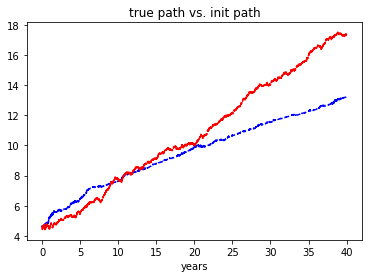

In [71]:
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, y_[0,1:].T, 'r--')
plt.title('true path vs. init path')
plt.xlabel('years')
plt.show()

# neg vol: [[607]]


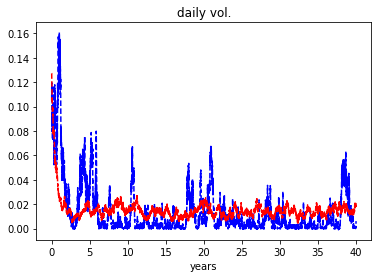

In [72]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b--')
plt.plot(years, y_[1,1:].T, 'r--')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()